In [10]:
# Jupyter notebook magic to reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys

sys.path.append(
    "/home/Marc/Marc_network_sims",
)  # path to the code with the functions

## Select a file


In [12]:
import pickle

# Path to the pickle file
pkl_path_1 = "/mnt/internserver1_1tb/data/MarcData/Data14_Current_Burst/gna_0.50_gk_0.70_noise_1.30/00.pkl"

# Load the pickle file
# load path 1
try:
    with open(pkl_path_1, "rb") as file:
        data = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

Data loaded successfully.


# Scatterplot of population spike times


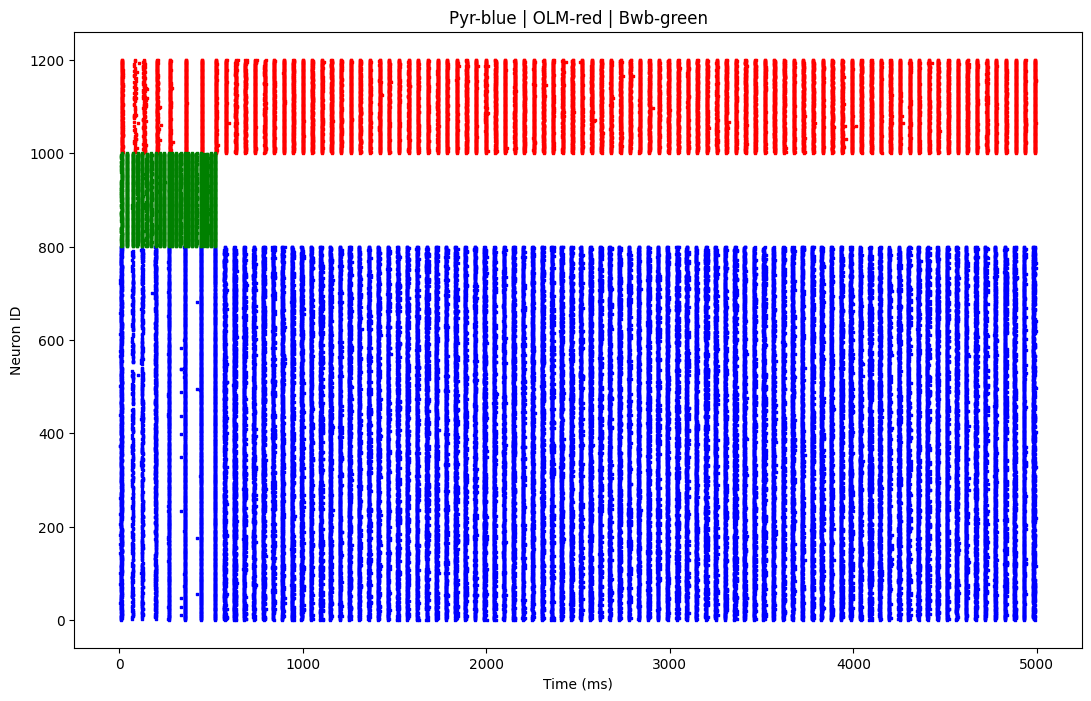

In [13]:
from src.SanjayCode import scatter_plot

scatter_plot(data["simData"])

Removed


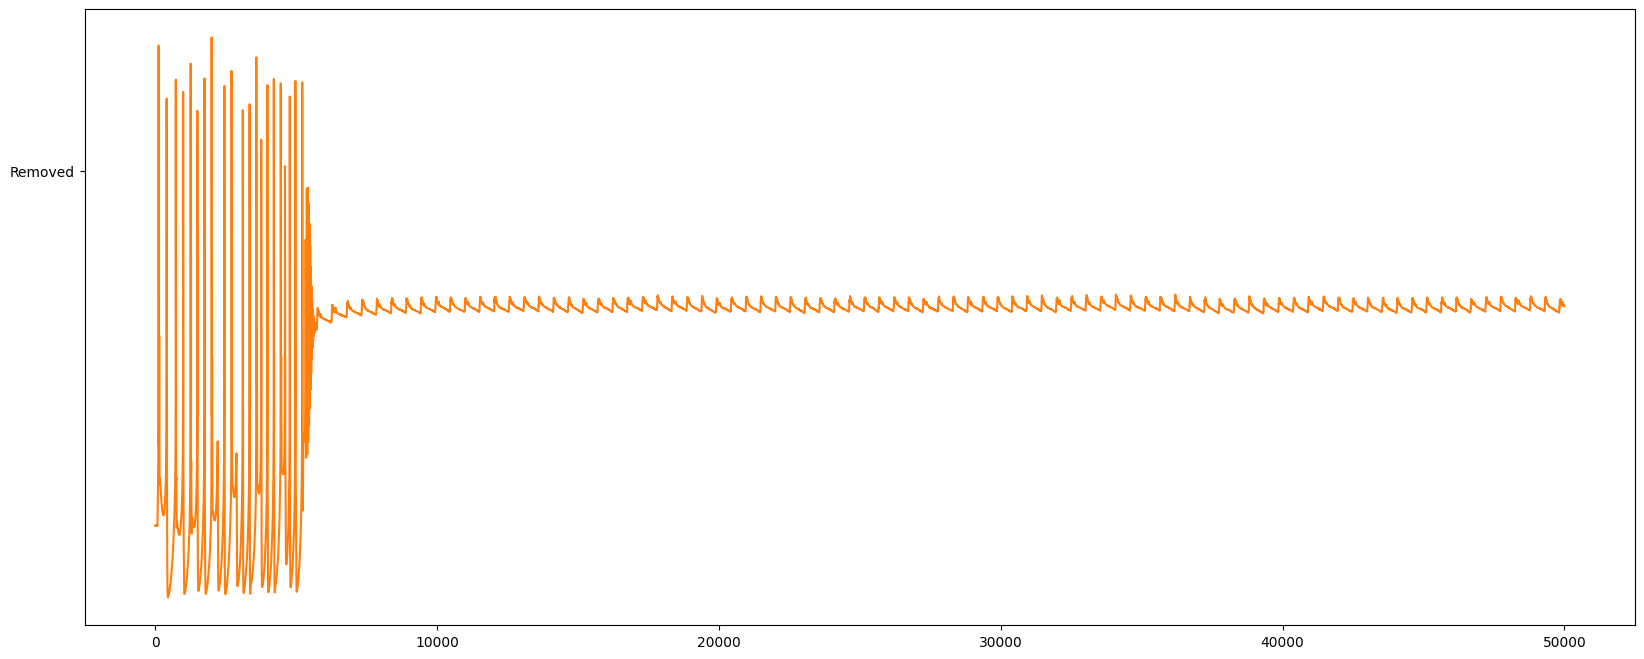

In [14]:
import matplotlib.pyplot as plt


## data structure
# print(data.keys())
# print(data["simData"].keys())
# print(data["simData"][801].spike_times)
print(data["simData"][809].soma_v)

plt.figure(figsize=(20, 8))
plt.plot(data["simData"][809].soma_v)  # for cell GID 800 -> 1000 = basket cell
plt.plot(
    data["simData"][810].soma_v
)  # 800 -> 809 are have removed soma_v, to save storage space

# Average basket cell soma voltage


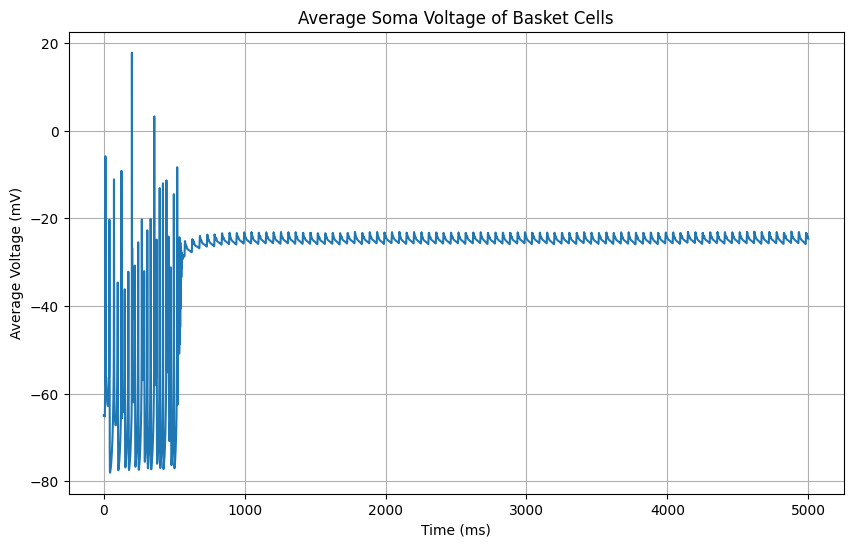

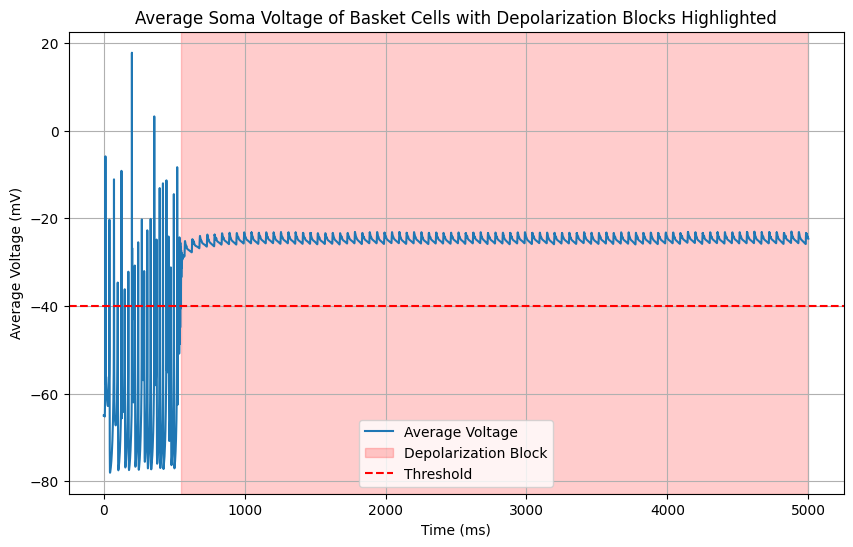

Block from 545.5 ms to 5000.0 ms, duration: 4454.6 ms


In [15]:
from src.SanjayCode import plot_average_voltage
from src.SanjayCode import find_sustained_blocks
from src.SanjayCode import plot_voltage_with_depolarization_blocks
import numpy as np  # for np.linspace


# Parameters
start_gid = 810
end_gid = 999
time_step = 0.1
depolarization_threshold = -40.0  # in mV
significant_duration = (
    50  # Define the number of consecutive time points to be considered significant
)
total_dur = 5000  # in ms
num_indices = 50000  # number of indices for the total duration

# Calculate the average voltage
average_voltage = plot_average_voltage(data, start_gid, end_gid, time_step)

# Find sustained depolarization blocks
sustained_blocks = find_sustained_blocks(
    average_voltage, depolarization_threshold, significant_duration
)

# Create time points for the x-axis
time_points = np.linspace(0, total_dur, num_indices + 1)

# Plot the average voltage with sustained depolarization blocks
plot_voltage_with_depolarization_blocks(
    average_voltage,
    sustained_blocks,
    depolarization_threshold,
    time_points,
)

# Absolute average basket cell soma voltage


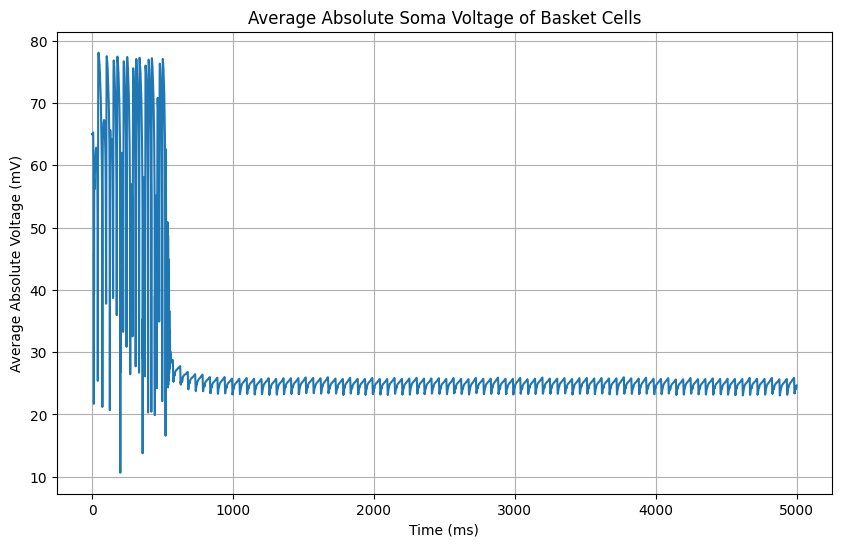

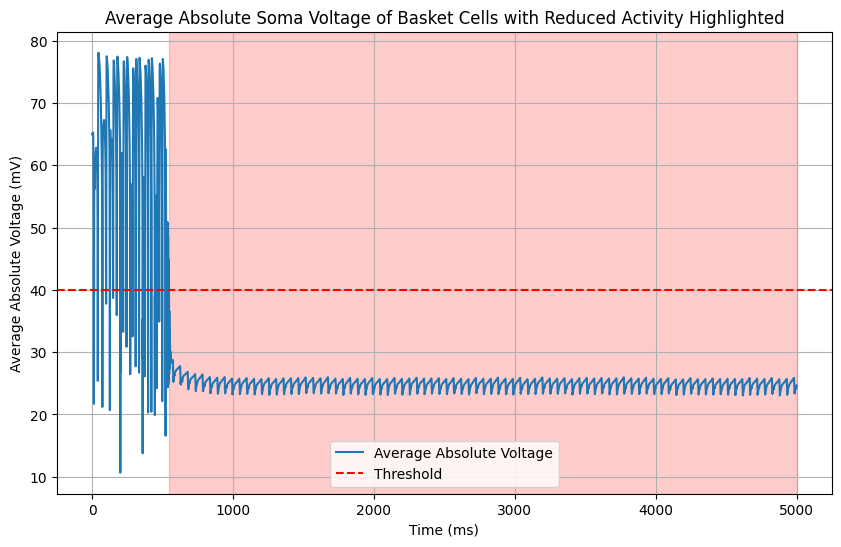

Reduced activity block from 545.5 ms to 5000.0 ms, duration: 4454.6 ms


In [16]:
from src.SanjayCode import plot_average_absolute_voltage
from src.SanjayCode import find_sustained_blocks
from src.SanjayCode import plot_absolute_voltage_depolarization_blocks
import numpy as np  # for np.linspace

# Parameters
start_gid = 810
end_gid = 999
time_step = 0.1
depolarization_threshold = (
    40.0  # in mV, positive value because absolute voltage is considered
)
significant_duration = (
    50  # Define the number of consecutive time points to be considered significant
)
total_dur = 5000  # in ms
num_indices = 50000  # number of indices for the total duration

# Calculate the average absolute voltage
average_absolute_voltage = plot_average_absolute_voltage(
    data, start_gid, end_gid, time_step
)

# Find sustained depolarization blocks
sustained_blocks = find_sustained_blocks(
    average_absolute_voltage,
    depolarization_threshold,
    significant_duration,
    condition="absolute",
)

# Create time points for the x-axis
time_points = np.linspace(0, total_dur, num_indices + 1)

# Plot the average absolute voltage with sustained depolarization blocks
plot_absolute_voltage_depolarization_blocks(
    average_absolute_voltage,
    sustained_blocks,
    depolarization_threshold,
    time_points,
    time_step,
)